# Fundamental 22. Regularization과 Normalization

#### Regularization : 정칙화
- __과적합(overfitting) 을 해결__하기 위한 방법 중의 하나
-  train loss는 약간 증가하지만 결과적으로, validation loss나 최종적인 test loss를 감소시키려는 목적
- L1, L2 Regularization, Dropout, Batch normalization 등이 있음

#### Normalization : 정규화
- 데이터의 형태를 좀 더 의미 있게, 혹은 training 에 적합하게 전처리하는 과정
- 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 등의 방법 존재
- __모든 피처의 범위 분포를 동일__하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어줌
- ex. 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0 ~ 24) 의 값이 들어가는 경우, 학습에 방해를 받을 수 있음 --> 모두 0~1 사이 값으로 변환

## Regularization와 Normalization의 간단한 예제

 Iris dataset의 회귀 문제를 풀면서 Regularization와 Normalization의 간단한 예제를 살펴보자.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Normalization

Iris data 중 `virginica` 라는 종의` petal length`(꽃잎 길이)를 `X`, `sepal length`(꽃받침의 길이)를 `Y`로 두고 분포를 시각화해보자.

In [4]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']


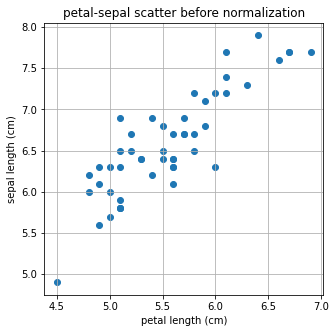

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

아직 Normalization을 하지 않았기 때문에 x축과 y축은 각각의 최솟값과 최댓값의 범위로 나타난다.

이제 0-1로 normlization을 해주는 `minmax_scale`를 이용해 Normalization을 한 후 산점도를 비교해보자.

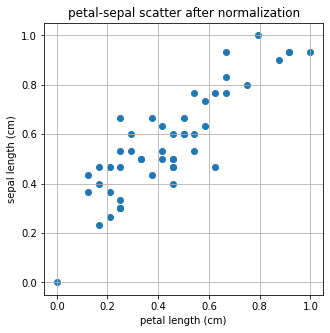

In [6]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

결과를 비교해보면, 가장 큰 값을 1, 가장 작은 값을 0으로 하여 축 범위가 바뀜을 확인할 수 있다.

### Regularization

`sklearn.linear_model`에 포함된 `LinearRegression` 모델을 사용하여 X-Y 관계를 선형으로 모델링 해보겠다.   

이 `sklearn.linear_model`에는 L1, L2 Regression인 Lasso와 Ridge 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해할 수 있다.

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


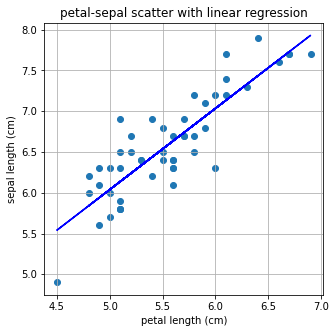

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번에는 __L1 regularization인 Lasso__ 로 Regression 해보자.

기울기 : 0.00, 절편 : 6.59


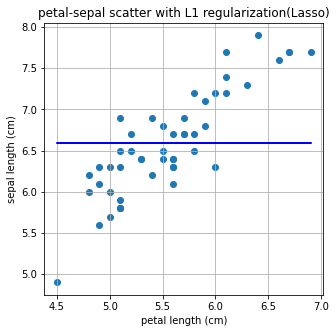

In [9]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기가 0으로 나오는 것을 확인 할 수 있다.  Lasso 방법은 제대로 문제를 풀어내지 못하는 것 같다. 그 이유는 블로그에 정리하였다.  

>

이번에는 __L2 regularization인 Ridge__ 로 Regression 해보자.

기울기 : 0.93, 절편 : 1.41


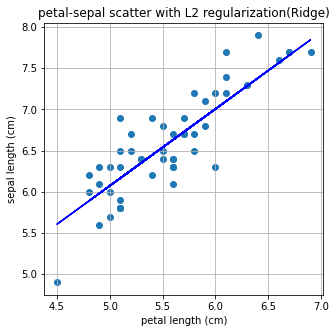

In [10]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

----
## L1 Regularization
L1 Regularization을 사용할 때는 X가 2차원 이상인 여러 컬럼 값이 있는 데이터일 때 실제 효과를 볼 수 있다.

컬럼 수가 많은 데이터에서의 L1 regularization 비교하자. wine dataset 을 이용하겠다.

In [11]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [12]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


먼저 Linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력해보자.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


이번에는 L1 regularization으로 문제를 풀고 비교해보겠다.

In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트
pred = L1.predict(X_test)

# 모델 성능
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


#### 결과 분석
- coefficient 부분을 보시면 Linear Regression과 L1 Regularization의 차이가 두드러짐
- Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구함
- L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임
- Error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있음
- 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측함을 알 수 있음

----
## Dropout
fashion mnist 라는 데이터 셋을 불러와서 dropout 기법을 구현한다.

### not overfitting 상황

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [18]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


dropout의 확률을 0.9로 주었을 때의 결과를 살펴보자.

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6425 - accuracy: 0.3848
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1869 - accuracy: 0.5230
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0981 - accuracy: 0.5603
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0586 - accuracy: 0.5689
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0440 - accuracy: 0.5742


Dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인할 수 있다.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6307 - accuracy: 0.7829
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3745 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3346 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3076 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2915 - accuracy: 0.8934


현재 이 데이터 셋은 학습이 잘 되는 데이터 셋으로, fully connected layer에서도 결과가 잘 나옴을 확인할 수 있다.

### overfitting 상황
위의 데이터를 이제 train:valid=99:1로 split 한 뒤에 loss function의 값을 그려보고, overfitting 이 나는 fully connected layer를 만들어보자.

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 6ms/step - loss: 2.2063 - accuracy: 0.4311 - val_loss: 1.6545 - val_accuracy: 0.6033
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.5340 - accuracy: 0.5940 - val_loss: 1.1889 - val_accuracy: 0.6683
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1446 - accuracy: 0.6569 - val_loss: 0.9663 - val_accuracy: 0.7067
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9358 - accuracy: 0.7093 - val_loss: 0.8223 - val_accuracy: 0.7567
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8109 - accuracy: 0.7304 - val_loss: 0.7368 - val_accuracy: 0.7567
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.7429 - val_loss: 0.6902 - val_accuracy: 0.7700
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.7581 - val_loss: 0.6585 - val_accuracy: 0.7833

Epoch 58/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8593 - val_loss: 0.3976 - val_accuracy: 0.8367
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8640 - val_loss: 0.3930 - val_accuracy: 0.8333
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8642 - val_loss: 0.3912 - val_accuracy: 0.8350
Epoch 61/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8662 - val_loss: 0.3904 - val_accuracy: 0.8383
Epoch 62/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8659 - val_loss: 0.3927 - val_accuracy: 0.8350
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8664 - val_loss: 0.3919 - val_accuracy: 0.8400
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8670 - val_loss: 0.3889 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8820 - val_loss: 0.3509 - val_accuracy: 0.8583
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3360 - accuracy: 0.8821 - val_loss: 0.3482 - val_accuracy: 0.8533
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8795 - val_loss: 0.3494 - val_accuracy: 0.8617
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8846 - val_loss: 0.3480 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8814 - val_loss: 0.3490 - val_accuracy: 0.8517
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8808 - val_loss: 0.3454 - val_accuracy: 0.8517
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8832 - val_loss: 0.3515 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8932 - val_loss: 0.3267 - val_accuracy: 0.8667
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8913 - val_loss: 0.3309 - val_accuracy: 0.8650
Epoch 173/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8928 - val_loss: 0.3297 - val_accuracy: 0.8633
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3013 - accuracy: 0.8930 - val_loss: 0.3296 - val_accuracy: 0.8667
Epoch 175/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8921 - val_loss: 0.3303 - val_accuracy: 0.8650
Epoch 176/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8933 - val_loss: 0.3267 - val_accuracy: 0.8650
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.8938 - val_loss: 0.3302 - val_accuracy: 0.8667

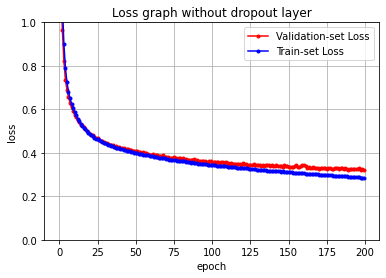

In [22]:
# loss 값을 plot
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

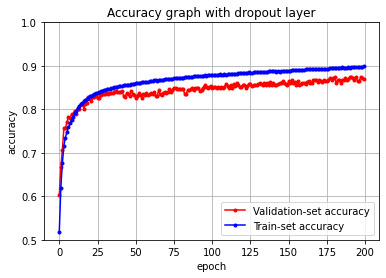

In [23]:
# accuracy 값을 plot 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인할 수 있다.

----
## Batch Normalization

 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교했다. 
 
 중점적으로 봐야할 내용은 __정확도 비교__와 __속도의 차이__ 이다.

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [25]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 16ms/step - loss: 1.6676 - accuracy: 0.4554 - val_loss: 0.7672 - val_accuracy: 0.7398
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6975 - accuracy: 0.7626 - val_loss: 0.6030 - val_accuracy: 0.7952
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5654 - accuracy: 0.8121 - val_loss: 0.5346 - val_accuracy: 0.8203
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5118 - accuracy: 0.8295 - val_loss: 0.4991 - val_accuracy: 0.8313
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4789 - accuracy: 0.8386 - val_loss: 0.4742 - val_accuracy: 0.8396
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4548 - accuracy: 0.8456 - val_loss: 0.4542 - val_accuracy: 0.8453
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4341 - accuracy: 0.8529 - val_loss: 0.4399 - val_accuracy: 0.8504
Epoch 8/20
21/21 [=

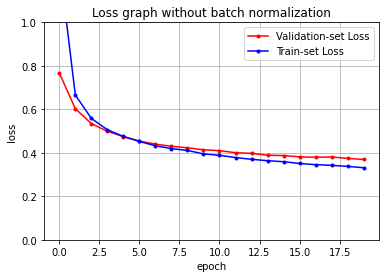

In [27]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

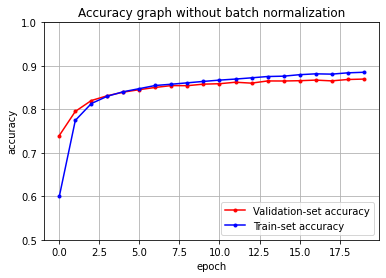

In [28]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### BatchNoramlization layer를 추가

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 17ms/step - loss: 1.3910 - accuracy: 0.5430 - val_loss: 1.0203 - val_accuracy: 0.7096
Epoch 2/20
21/21 [==============================] - 0s 8ms/step - loss: 0.5427 - accuracy: 0.8158 - val_loss: 0.8344 - val_accuracy: 0.7615
Epoch 3/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4653 - accuracy: 0.8407 - val_loss: 0.7418 - val_accuracy: 0.7942
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4246 - accuracy: 0.8524 - val_loss: 0.7014 - val_accuracy: 0.8016
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 0.3888 - accuracy: 0.8673 - val_loss: 0.6303 - val_accuracy: 0.8297
Epoch 6/20
21/21 [==============================] - 0s 8ms/step - loss: 0.3626 - accuracy: 0.8756 - val_loss: 0.6100 - val_accuracy: 0.8232
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.3453 - accuracy: 0.8807 - val_loss: 0.5480 - val_accuracy: 0.8523
Epoch 8/20
21/21 [=

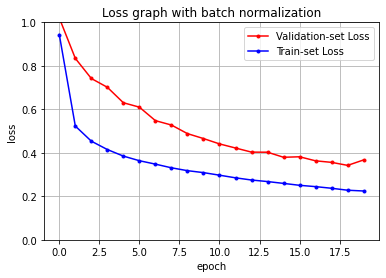

In [30]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

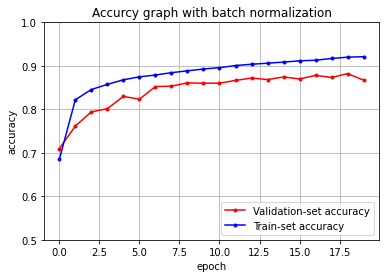

In [31]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 기존의 fully connected layer도 낮지 않은 결과를 가져오지만, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있다.  

- loss 함수의 감소도 더 빨라짐을 확인할 수 있다.

- Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 앞서 설명해 드린 \epsilonϵ 부분으로 인해 안정적인 학습이 가능해짐